Modules

In [1]:
import biota.steadyfluxes as steady
import matplotlib.pyplot as plt

---------------------------------------------

Specify bioreactor parameters and construct bioreactor class instance from them.
Values are derived from the 20,000 litre stirred aerated tank example case from Humbird https://doi.org/10.31224/osf.io/795su . Fed batch operation is considered here, no perfusion.

In [2]:
workingVolume = 20000
tankDiameter = 2.34
impellerDiameter = tankDiameter/3
rpm = 42.3
backPressure = 1.3
superficialVel = 0.004
moleFracO2 = 0.21
initVol = 0.76 * workingVolume
initCells = 0.6e6
temp = 310
powerNumber = 5
mediumDensity = 1000
mediumViscosity = 9e-4
vesselVolDay = 0.0
perfLactateRate = 5.0
perfAmmrate = 5.0

STR_Humbird_20kl = steady.Bioreactor(wv=workingVolume,t=tankDiameter,d=impellerDiameter,n=rpm,p_back=backPressure,u_s=superficialVel,mf_O2_gas=moleFracO2,v0=initVol,ns=initCells,Temp=temp,
                                     Np=powerNumber,rho=mediumDensity,mu=mediumViscosity,vvd=vesselVolDay,perfAMM=perfAmmrate,perfLAC=perfLactateRate)


-----------------------------------------

Specify cell parameters and create instance of cell class from them. Values are derived from the un-enhanced CHO model of Humbird https://doi.org/10.31224/osf.io/795su for the two doublings production scenario.

In [3]:
growthRate = 0.029

glutamineUptakeRate = 0
glucoseUptakeRate = 0
oxygenUptakeRate = 0.45
uptakeList = [glutamineUptakeRate, glucoseUptakeRate, oxygenUptakeRate]

carbonDioxideProdRate = 0.57
ammoniaProductionRate = 0.092
lactateProductionRate = 0.624
prodList = [carbonDioxideProdRate, ammoniaProductionRate, lactateProductionRate]

massDensity = 1030
cellRadius = 18e-6
wetmass = 3000
dryMassFraction = 0.3

ammoniaLimit = 5
lactateLimit = 50
CO2Limit = 100
turbLengthLimit = 20e-6
limitsList = [ammoniaLimit, lactateLimit, CO2Limit, turbLengthLimit]


cell_Humbird = steady.Cell(mu=growthRate,uptakes=uptakeList,prod=prodList,rho=massDensity,rad=cellRadius,wetmass=wetmass,dmf=dryMassFraction,limits=limitsList)

-------------------------------------------------

Execute production performance function 

In [10]:
(a,b,c) = steady.prodPerf(STR_Humbird_20kl,cell_Humbird,144)

-------------------------------------------------------------------

Dataframe returned by production performance function

In [11]:
a

,Time [hr],Volume [L],Mixing Time [s],Required kLa [1/s],Theoretical kLa [1/s],Required/Theoretical kLa [-],Required kLa * Mixing Time [-],pCO2 [mbar],Ammonia [mmol/L],Lactate [mmol/L],Volume Fraction [-],lambda_k [m],Superficial Gas Top [m/s],Cell Density [wet g/L]
0,0.000000,15200.000000,105.528229,0.000461,0.006510,0.070752,0.048609,1.465855,0.000000,0.000000,0.014657,0.000022,0.005313,1.800000
1,0.144144,15200.933263,105.546588,0.000463,0.006510,0.071051,0.048822,1.471975,0.007176,0.048669,0.014718,0.000022,0.005313,1.807429
2,0.288288,15201.870435,105.565026,0.000464,0.006510,0.071351,0.049035,1.478120,0.014380,0.097537,0.014779,0.000022,0.005314,1.814888
3,0.432432,15202.811533,105.583544,0.000466,0.006510,0.071652,0.049249,1.484291,0.021615,0.146603,0.014840,0.000022,0.005314,1.822378
4,0.576577,15203.756573,105.602141,0.000468,0.006510,0.071955,0.049464,1.490488,0.028878,0.195868,0.014901,0.000022,0.005314,1.829898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,143.423423,29241.590673,673.722885,0.031572,0.004787,6.595406,21.270642,77.554172,56.123084,380.660919,0.487811,0.000025,0.006430,59.905561
996,143.567568,29301.343167,677.630819,0.031713,0.004782,6.631203,21.489511,77.821533,56.246975,381.501219,0.488856,0.000025,0.006435,60.033828
997,143.711712,29361.345960,681.569852,0.031854,0.004778,6.667214,21.710924,78.089618,56.370876,382.341596,0.489901,0.000026,0.006439,60.162106
998,143.855856,29421.600100,685.540265,0.031997,0.004773,6.703442,21.934913,78.358426,56.494789,383.182045,0.490945,0.000026,0.006444,60.290395


-------------------------------------------------

Look at constraints individually to see the limited duration and yield for each of them. Output is in the form:
constraint (duration \[hrs\], yield \[wet g/L\])

In [12]:
for i in range(0,len(c)):
    print (b[i],c[i]) 

ammonia (48.288288288288285, 6.988870168807263)
lactate (59.387387387387385, 9.438654669513934)
CO2 (144.0, 60.41869446155145)
kla (88.36036036036036, 19.85820335138183)
mixing (88.21621621621621, 19.788714166293083)
volume fraction (107.24324324324324, 30.715539027330248)
hydrodynamic stress (144.0, 60.41869446155145)
superficial velocity (127.13513513513513, 45.75574575274669)
volume (52.612612612612615, 7.8628520052134965)


--------------------------------------------------------

Plot key constraints against time, in the same format as Figure 2.7 (page 27) of https://doi.org/10.31224/osf.io/795su <br>
Code modified from https://matplotlib.org/3.4.3/gallery/ticks_and_spines/multiple_yaxis_with_spines.html

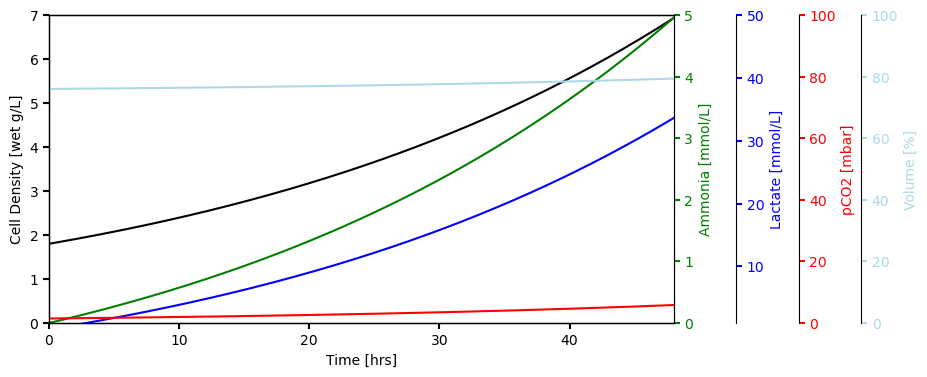

In [21]:
fig, ax = plt.subplots(figsize=(10,4))
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()
twin3 = ax.twinx()
twin4 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines.right.set_position(("axes", 1.1))
twin3.spines.right.set_position(("axes", 1.2))
twin4.spines.right.set_position(("axes", 1.3))

p1, = ax.plot(a['Time [hr]'],a['Cell Density [wet g/L]'], "black")
p2, = twin1.plot(a['Time [hr]'],a['Ammonia [mmol/L]'], "green")
p3, = twin2.plot(a['Time [hr]'],a['Lactate [mmol/L]'], "blue")
p4, = twin3.plot(a['Time [hr]'],a['pCO2 [mbar]'], "red")
p5, = twin4.plot(a['Time [hr]'],a['Volume [L]']/workingVolume*100, "lightblue")

ax.set_xlim(0, 48)
ax.set_ylim(0, 7)
twin1.set_ylim(0, 5)
twin2.set_ylim(1, 50)
twin3.set_ylim(0, 100)
twin4.set_ylim(0, 100)

ax.set_xlabel("Time [hrs]")
ax.set_ylabel("Cell Density [wet g/L]")
twin1.set_ylabel("Ammonia [mmol/L]")
twin2.set_ylabel("Lactate [mmol/L]")
twin3.set_ylabel("pCO2 [mbar]")
twin4.set_ylabel("Volume [%]")

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())
twin3.yaxis.label.set_color(p4.get_color())
twin4.yaxis.label.set_color(p5.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
twin3.tick_params(axis='y', colors=p4.get_color(), **tkw)
twin4.tick_params(axis='y', colors=p5.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

#ax.legend(handles=[p1, p2, p3])

plt.show()

------------------------------